In [1]:
import pandas as pd
import numpy as np
import math
import io
from tqdm import tqdm

tqdm.pandas()


In [2]:
# Creating a date,month, hour column for ease of visualizing later
data = pd.read_csv("2019tweets.csv")
data["date2"] = pd.to_datetime(data["date"],errors= "coerce").dt.date
data["month"] = pd.to_datetime(data["date"],errors= "coerce").dt.month
data["hour"] = pd.to_datetime(data["date"],errors= "coerce").dt.hour
data_group = data.groupby(data['date2']).agg("count")
print(data_group.head(30))
print(data)


/home/yq/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


            Unnamed: 0   date  username  replies  retweets  favorites   text  \
date2                                                                          
2019-01-01       16179  16179     16179    16179     16179      16179  16178   
2019-01-02       15200  15200     15200    15200     15200      15200  15200   
2019-01-03       24902  24902     24902    24902     24902      24902  24902   
2019-01-04       20172  20172     20172    20172     20172      20172  20171   
2019-01-05       11520  11520     11520    11520     11520      11520  11520   
2019-01-06       17030  17030     17030    17030     17030      17030  17030   
2019-01-07       21300  21300     21300    21300     21300      21300  21300   
2019-01-08       19500  19500     19500    19500     19500      19500  19500   
2019-01-09       20745  20745     20745    20745     20745      20745  20745   
2019-01-10       21512  21512     21512    21512     21512      21512  21512   
2019-01-11       20301  20301     20301 

In [3]:

# Get names of indexes for which column Age has value 30
indexNames = data[ data['favorites'] == "favorites" ].index

# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [4]:
data

,Unnamed: 0,date,username,replies,retweets,favorites,text,id,subjectivity,blob_sent,vader_sent,ad_count,adwords,date2,month,hour
0,0.0,2019-10-10 23:59:59,CryptoPressNews,0,0,0,BTC bitcoins Current Price h h ...,1182445706293854208,0.45,0.25,0,0,[],2019-10-10,10.0,23.0
1,1.0,2019-10-10 23:59:58,cryptobuzzr,0,0,0,Top Altcoins Of,1182445702389075971,0.5,0.5,0.2023,0,[],2019-10-10,10.0,23.0
2,2.0,2019-10-10 23:59:35,mas_elbab,0,0,0,Free Bitcoins Faucet Earn free btc in minut...,1182445602979794944,0.8,0.4,0.765,0,[],2019-10-10,10.0,23.0
3,3.0,2019-10-10 23:59:32,1jl4com,0,0,0,Brazil Senegal Roberto Firmino on target with...,1182445593513353217,0.454545,0.136364,0.4404,0,[],2019-10-10,10.0,23.0
4,4.0,2019-10-10 23:59:22,crypwalkjay,0,1,4,Can you imagine when XRP over throws Bitcoin f...,1182445550332985349,0.541667,-0.455729,0.639,0,[],2019-10-10,10.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265262,612763.0,2019-09-09 00:00:02,the1bitcoinbot,0,0,0,The Bitcoin BTC price is currently USD or EU...,1170849304652767234,0.233333,0,0.0772,0,[],2019-09-09,9.0,0.0
6265263,612764.0,2019-09-09 00:00:02,coinstats,0,0,0,Bitcoin BTC Price Change in h Market cap R...,1170849304543555584,0.9,-0.8,0,0,[],2019-09-09,9.0,0.0
6265264,612765.0,2019-09-09 00:00:02,NapalmDeathBot,0,0,0,You Suffer But why Bitcoin just hit time ...,1170849304396910592,0,0,-0.5093,0,[],2019-09-09,9.0,0.0
6265265,612766.0,2019-09-09 00:00:01,thomas_lub,0,0,0,A new post Crypto News From Brazil Sept in Re...,1170849303067267072,0.454545,0.136364,0,0,[],2019-09-09,9.0,0.0


In [5]:
#classify if tweet is ad or not. Needs improvement
#0 is ad, 1 is normal
def ad_classifier(x):
    try:
        if x >1 :
            return 0
        else:
            return 1
    except:
        print(x)

data["ad_class"] = data.progress_apply(lambda x:ad_classifier(int(x["ad_count"])),axis=1)
#nlarg allows you to see the tweets with the highest adcounts


100%|██████████| 6264964/6264964 [01:04<00:00, 97497.09it/s] 


In [6]:
data.astype({'ad_count': 'float64'}).dtypes
#nlarg = data.nlargest(30,"ad_count")
count = data["ad_class"].value_counts()
print(count)

1    6262036
0       2928
Name: ad_class, dtype: int64


n : int

    Number of items to retrieve

columns : list or str

    Column name or names to order by

keep : {‘first’, ‘last’, False}, default ‘first’

    Where there are duplicate values: - first : take the first occurrence. - last : take the last occurrence

In [7]:
prominentusers = set(['iamjosephyoung', 'Bitcoin', 'BitcoinMagazine', 'btc', 'BTCNewsletter', 'BTCTN', 'coindesk', 'MoonOverlord',
                      'TuurDemeester', 'CryptoCoinsNews', 'LandM_Marius', 'kerooke', 'loomdart', 'GemCrypto', 
                      'coinnounce', 'MatiGreenspan', 'JWilliamsFstmed', 'VitalikButerin', 'VladZamfir', 'aantonop',
                      'ethereumJoseph', 'gavofyork', 'naval', 'tayvano_', 'NickSzabo4', 'cburniske',
                      'jwolpert', 'AndrewDARMACAP', 'ricburton', 'bcrypt', 'mikeraymcdonald',
                      'evan_van_ness', 'FEhrsam', 'JohnLilic', 'avsa', 'antiprosynth', 'nlw', 'brian_armstrong', 
                      'twobitidiot', 'APompliano', 'Cointelegraph', 'coinmetrics'])
def usernamer(x):
    if x in prominentusers:
        return 1
    else:
        return 0
data["prominent_user"] = data.progress_apply(lambda x:usernamer(x["username"]),axis=1)


100%|██████████| 6264964/6264964 [01:02<00:00, 99458.57it/s] 


In [8]:
keywords = ['onchain transaction', 'congestion', 'market cap','market cap drop', 'dispersion of returns', 'downturn', 'exchange volume', 'ATH', 'ath', 'atl', 'ATL',
            'bear trap', 'btfd', 'BTFD', 'buy wall', 'deflation', 'dump', 'fomo', 'FOMO', 'mooning', 'whale']
def keychecker(text):
    words = []
    count = 0
    for i in keywords:
        if (contains_word(str(text),i)):
            count+= 1
            words.append(i)
    return count
def keyword(text):
    words = []
    count = 0
    for i in keywords:
        if (contains_word(str(text),i)):
            count+= 1
            words.append(i)
    return words
def contains_word(s, w):
    return (' ' + w + ' ') in (' ' + s + ' ')

data["key_count"] = data.progress_apply(lambda x:keychecker(x["text"]),axis=1)
data["keywords"] = data.progress_apply(lambda x:keyword(x["text"]),axis=1)


100%|██████████| 6264964/6264964 [01:56<00:00, 53578.83it/s]


In [9]:
print(data)
promu = data.nlargest(30,"key_count")
promu

         Unnamed: 0                 date         username replies retweets  \
0               0.0  2019-10-10 23:59:59  CryptoPressNews       0        0   
1               1.0  2019-10-10 23:59:58      cryptobuzzr       0        0   
2               2.0  2019-10-10 23:59:35        mas_elbab       0        0   
3               3.0  2019-10-10 23:59:32          1jl4com       0        0   
4               4.0  2019-10-10 23:59:22      crypwalkjay       0        1   
...             ...                  ...              ...     ...      ...   
6265262    612763.0  2019-09-09 00:00:02   the1bitcoinbot       0        0   
6265263    612764.0  2019-09-09 00:00:02        coinstats       0        0   
6265264    612765.0  2019-09-09 00:00:02   NapalmDeathBot       0        0   
6265265    612766.0  2019-09-09 00:00:01       thomas_lub       0        0   
6265266    612767.0  2019-09-09 00:00:00     CryptoHourly       0        0   

        favorites                                              

,Unnamed: 0,date,username,replies,retweets,favorites,text,id,subjectivity,blob_sent,vader_sent,ad_count,adwords,date2,month,hour,ad_class,prominent_user,key_count,keywords
95703,95703.0,2019-10-15 23:33:12,EditionSatoshi,0,0,2,Im obviously a little off with the timing but ...,1184250903844589568,0.452652,0.00558712,0.7822,0,[],2019-10-15,10.0,23.0,1,0,3,"[ATH, bear trap, dump]"
2935783,45001.0,2019-05-11 06:11:36,leb_crypto,0,0,2,We may be seeing FOMO now However Real FOMO k...,1127093880929832960,0.30000000000000004,0.2,0.0,0,[],2019-05-11,5.0,6.0,1,0,3,"[ATH, fomo, FOMO]"
3046977,156195.0,2019-05-15 00:05:37,__CryptoNews,0,0,0,Where Did This Bitcoin Pump Come From RealFake...,1128451330593308672,0.3,0.2,0.6402,0,[],2019-05-15,5.0,0.0,1,0,3,"[FOMO, mooning, whale]"
3155721,264939.0,2019-05-01 00:11:01,theefenders,0,1,1,Whanos the market manipulator and whale behind...,1123379257940566021,0.433333,-0.283333,-0.3818,0,[],2019-05-01,5.0,0.0,1,0,3,"[market cap, dump, whale]"
3172467,281685.0,2019-05-20 10:14:49,jc57198365,0,0,0,OTCBitcoin If I think like a whale and I see a...,1130416580448272385,0.313889,-0.00794271,0.3129,0,[],2019-05-20,5.0,10.0,1,0,3,"[dump, fomo, whale]"
3259997,369215.0,2019-05-24 21:05:04,Beastlyorion,1,0,5,if she can eat that much every time it might b...,1132029773767745541,0.2,0.2,0.4466,0,[],2019-05-24,5.0,21.0,1,0,3,"[btfd, dump, whale]"
3706842,95313.0,2019-06-15 20:26:11,Crypto_Fido,0,0,2,If I were a whale what would I do if I were a ...,1139992520291758082,0.454545,0.170455,0.1739,0,[],2019-06-15,6.0,20.0,1,0,3,"[ATH, FOMO, whale]"
3922228,310699.0,2019-06-23 11:56:57,CryptoConspira2,0,0,0,Whats this bull runs Uber driver investment ad...,1142763469407571969,0.4,-0.25,-0.5803,0,[],2019-06-23,6.0,11.0,1,0,3,"[ATH, dump, FOMO]"
3922232,310703.0,2019-06-23 11:56:10,CryptoConspira2,0,0,0,Whats this bull runs Uber driver investment ad...,1142763273122488320,0.4,-0.25,-0.5803,0,[],2019-06-23,6.0,11.0,1,0,3,"[ATH, dump, FOMO]"
4469229,195761.0,2019-07-17 16:14:10,TheCryptoZombie,5,4,31,bear trap or k inevitable Bitcoin still on tra...,1151525510402453507,0.414848,0.190341,0.2695,0,[],2019-07-17,7.0,16.0,1,0,3,"[downturn, ATH, bear trap]"


In [10]:
def log_score(x):
    try:
        #x.astype(float)
        if int(x)<1:
            return 0
        else:
            return np.log(int(x))
    except:
        print(x)
        return 0
   # df[['Mean','Sum']] = df[['height_at_age_10','height_at_age_20']].apply(mean_and_sum(x),axis=1)
            #np.log(df.astype(float))
data["RT_score"] = data.progress_apply(lambda x:log_score(x["retweets"]),axis=1)
data["Reply_score"] = data.progress_apply(lambda x:log_score(x["replies"]),axis=1)
data["fav_score"] = data.progress_apply(lambda x:log_score(x["favorites"]),axis=1)
#data["RT_score"] = np.log(data["retweets"].astype(float))
data

100%|██████████| 6264964/6264964 [01:10<00:00, 88652.99it/s]


,Unnamed: 0,date,username,replies,retweets,favorites,text,id,subjectivity,blob_sent,...,date2,month,hour,ad_class,prominent_user,key_count,keywords,RT_score,Reply_score,fav_score
0,0.0,2019-10-10 23:59:59,CryptoPressNews,0,0,0,BTC bitcoins Current Price h h ...,1182445706293854208,0.45,0.25,...,2019-10-10,10.0,23.0,1,0,0,[],0.0,0.0,0.000000
1,1.0,2019-10-10 23:59:58,cryptobuzzr,0,0,0,Top Altcoins Of,1182445702389075971,0.5,0.5,...,2019-10-10,10.0,23.0,1,0,0,[],0.0,0.0,0.000000
2,2.0,2019-10-10 23:59:35,mas_elbab,0,0,0,Free Bitcoins Faucet Earn free btc in minut...,1182445602979794944,0.8,0.4,...,2019-10-10,10.0,23.0,1,0,0,[],0.0,0.0,0.000000
3,3.0,2019-10-10 23:59:32,1jl4com,0,0,0,Brazil Senegal Roberto Firmino on target with...,1182445593513353217,0.454545,0.136364,...,2019-10-10,10.0,23.0,1,0,0,[],0.0,0.0,0.000000
4,4.0,2019-10-10 23:59:22,crypwalkjay,0,1,4,Can you imagine when XRP over throws Bitcoin f...,1182445550332985349,0.541667,-0.455729,...,2019-10-10,10.0,23.0,1,0,0,[],0.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265262,612763.0,2019-09-09 00:00:02,the1bitcoinbot,0,0,0,The Bitcoin BTC price is currently USD or EU...,1170849304652767234,0.233333,0,...,2019-09-09,9.0,0.0,1,0,0,[],0.0,0.0,0.000000
6265263,612764.0,2019-09-09 00:00:02,coinstats,0,0,0,Bitcoin BTC Price Change in h Market cap R...,1170849304543555584,0.9,-0.8,...,2019-09-09,9.0,0.0,1,0,0,[],0.0,0.0,0.000000
6265264,612765.0,2019-09-09 00:00:02,NapalmDeathBot,0,0,0,You Suffer But why Bitcoin just hit time ...,1170849304396910592,0,0,...,2019-09-09,9.0,0.0,1,0,0,[],0.0,0.0,0.000000
6265265,612766.0,2019-09-09 00:00:01,thomas_lub,0,0,0,A new post Crypto News From Brazil Sept in Re...,1170849303067267072,0.454545,0.136364,...,2019-09-09,9.0,0.0,1,0,0,[],0.0,0.0,0.000000


In [11]:
data["minute"] = pd.to_datetime(data["date"],errors= "coerce").dt.minute
## for daily
#data["minute"] = pd.to_datetime(data["date"],errors= "coerce").dt.minute
def half(duration,x):
    try:
        if duration == "daily":
            #print(x)
            if int(x) >11:
                return 1
            else:
                return 0
        if duration =="hourly":
            if int(x) > 30:
                return 1
            else:
                return 0
    except:
        print(x)
        return 0
        
data["hour_score"] = data.progress_apply(lambda x:half("hourly",x["minute"]),axis=1)
data["daily_score"] = data.progress_apply(lambda x:half("daily",x["hour"]),axis=1)


100%|██████████| 6264964/6264964 [01:05<00:00, 95158.93it/s] 


In [91]:
data["Daily Weight"] = (data["prominent_user"]+data["key_count"]+data["RT_score"]+data["Reply_score"]+data["fav_score"]+data["daily_score"])*data["ad_class"] 
data["hourly Weight"] = (data["prominent_user"]+data["key_count"]+data["RT_score"]+data["Reply_score"]+data["fav_score"]+data["hour_score"])*data["ad_class"] 

#weights['Weight (daily)'] =  (weights['username']+weights['Keywords'] + weights['retweets']+weights['replies']+weights['favorites']+weights['time'])*weights['Ads']
#weights['Weight (hourly)'] =  (weights['username']+weights['Keywords'] + weights['retweets']+weights['replies']+weights['favorites']+weights['time'])*weights['Ads']

In [92]:
data["blob_sent"] = data["blob_sent"]*data["Daily Weight"]
data["vader_sent"] = data["vader_sent"]*data["hourly Weight"]

In [74]:
#ata.to_csv("weighted_apr")
data['subjectivity'] = pd.to_numeric(data["subjectivity"],errors='coerce')
data['vader_sent'] = pd.to_numeric(data["vader_sent"],errors='coerce')
data['blob_sent'] = pd.to_numeric(data["blob_sent"],errors='coerce')
df = data.groupby(['date2','hour']).agg(['mean','count'])
df.columns = [ ' '.join(str(i) for i in col) for col in df.columns]
df.reset_index(inplace=True)
print(df.columns)

Index(['date2', 'Unnamed: 0 mean', 'Unnamed: 0 count', 'subjectivity mean',
       'subjectivity count', 'blob_sent mean', 'blob_sent count',
       'vader_sent mean', 'vader_sent count', 'month mean', 'month count',
       'hour mean', 'hour count', 'ad_class mean', 'ad_class count',
       'prominent_user mean', 'prominent_user count', 'key_count mean',
       'key_count count', 'RT_score mean', 'RT_score count',
       'Reply_score mean', 'Reply_score count', 'fav_score mean',
       'fav_score count', 'minute mean', 'minute count', 'hour_score mean',
       'hour_score count', 'daily_score mean', 'daily_score count',
       'Daily Weight mean', 'Daily Weight count'],
      dtype='object')


In [75]:
df= df.filter(['date2',"Daily Weight mean","Daily Weight count","blob_sent mean","subjectivity mean","vader_sent mean"])


In [89]:
print(df)
#df["weighted vader"] = df["Daily Weight mean"] * df["vader_sent mean"]
#df["weighted textblob"] = df["Daily Weight mean"] * df["blob_sent mean"]

#df= df.filter(['date2',"Daily Weight count","weighted vader","subjectivity mean","weighted textblob"])

df.to_csv("daily_weighted.csv")

          date2  Daily Weight count  weighted vader  subjectivity mean  \
0    2019-01-01               16179        0.122863           0.257403   
1    2019-01-02               15200        0.094268           0.289519   
2    2019-01-03               24902        0.147159           0.264893   
3    2019-01-04               20172        0.120873           0.264457   
4    2019-01-05               11520        0.121131           0.283877   
..          ...                 ...             ...                ...   
299  2019-10-27               18123        0.147390           0.268707   
300  2019-10-28               22372        0.129804           0.273006   
301  2019-10-29               21207        0.139528           0.278815   
302  2019-10-30               20828        0.128877           0.264650   
303  2019-10-31               22875        0.152526           0.248273   

     weighted textblob  
0             0.079338  
1             0.061316  
2             0.087616  
3          

In [43]:
#df2= df2.filter(['date2', 'hour',"Daily Weight","blob_sent","subjectivity","vader_sent"])
#df2 =df2.drop(columns = "Unnamed: 0 mean")
df2 = data.groupby(['date2','hour'])['subjectivity'].mean().reset_index().rename(
    columns={'date2':'date','hour':'hour','subjectivity' : 'mean subjectivity'})
df2

,date,hour,mean subjectivity
0,2019-01-01,0.0,0.240914
1,2019-01-01,1.0,0.258952
2,2019-01-01,2.0,0.231927
3,2019-01-01,3.0,0.240293
4,2019-01-01,4.0,0.243304
...,...,...,...
7146,2019-10-31,19.0,0.249690
7147,2019-10-31,20.0,0.267237
7148,2019-10-31,21.0,0.244910
7149,2019-10-31,22.0,0.243812


In [50]:
#df =  df.drop(columns = "month count")
df= df.filter(['date2', 'hour',"Daily Weight mean","Daily Weight count","blob_sent mean","subjectivity mean","vader_sent mean"])
#>>> df.drop(columns=['B', 'C'])
df

,date2,hour,Daily Weight mean,Daily Weight count,blob_sent mean,subjectivity mean,vader_sent mean
0,2019-01-01,0.0,0.777003,735,0.087982,0.240914,0.141403
1,2019-01-01,1.0,0.908439,603,0.095485,0.258952,0.162562
2,2019-01-01,2.0,0.774717,629,0.070023,0.231927,0.140533
3,2019-01-01,3.0,0.677896,546,0.117623,0.240293,0.175237
4,2019-01-01,4.0,0.774892,519,0.105240,0.243304,0.182293
...,...,...,...,...,...,...,...
7146,2019-10-31,19.0,0.949199,1150,0.093489,0.249690,0.146403
7147,2019-10-31,20.0,0.855586,1060,0.085452,0.267237,0.161475
7148,2019-10-31,21.0,1.003578,960,0.071420,0.244910,0.137342
7149,2019-10-31,22.0,0.844763,844,0.078463,0.243812,0.131512


In [51]:
df.to_csv("aggregated_hourly.csv")
data.to_csv("2019_tweet_weighted")

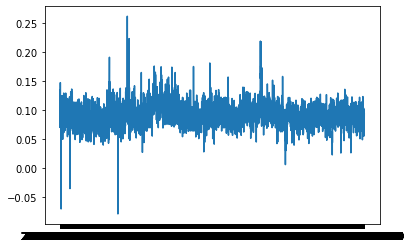

In [70]:
import matplotlib.pyplot as plt
#df['day n hour'] = df[['date2','hour']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)

plt.plot(df["day n hour"],df["blob_sent mean"])
plt.xticks(x, df["day n hour"], rotation='vertical')
plt.show()

In [73]:
df3 = data.groupby(['date2']).agg(['mean','count'])
df3.columns = [ ' '.join(str(i) for i in col) for col in df.columns]
df3.reset_index(inplace=True)
print(df3.columns)

ValueError: Length mismatch: Expected axis has 32 elements, new values have 8 elements